In [ ]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)

import random

import pickle

# ATLAS SPLIT and CLEANING

In [ ]:
adata = sc.read('/home/macera/Documentos/CZI/MANUSCRIPT_PREP/REVIEWS/external_data/heart/Global_raw.h5ad')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
selected_samples = {
    "Cell_3prime_v3": [
        "D11_Cell_3prime-v3",
    ],
    "Cell_3prime_v2": [
        "D6_Cell_3prime-v2",
        "D7_Cell_3prime-v2",
        "D5_Cell_3prime-v2",
    ],
    "Nuclei_3prime_v3": [
        "D11_Nuclei_3prime-v3",
        "H3_Nuclei_3prime-v3",
        "D5_Nuclei_3prime-v3",
    ],
    "Nuclei_3prime_v2": [
        "D6_Nuclei_3prime-v2",
        "D7_Nuclei_3prime-v2",
        "D11_Nuclei_3prime-v2",
    ],
    "Multiome_v1": [
        "D7_Nuclei_Multiome-v1",
        "D8_Nuclei_Multiome-v1",
        "AH2_Nuclei_Multiome-v1",
        "AV14_Nuclei_Multiome-v1",
        "AV3_Nuclei_Multiome-v1",
    ],
}

In [ ]:
lists=list(selected_samples.values())
flat_list = [x for sub in lists for x in sub]
samples = np.array(flat_list)
samples

array(['D11_Cell_3prime-v3', 'D6_Cell_3prime-v2', 'D7_Cell_3prime-v2',
       'D5_Cell_3prime-v2', 'D11_Nuclei_3prime-v3', 'H3_Nuclei_3prime-v3',
       'D5_Nuclei_3prime-v3', 'D6_Nuclei_3prime-v2',
       'D7_Nuclei_3prime-v2', 'D11_Nuclei_3prime-v2',
       'D7_Nuclei_Multiome-v1', 'D8_Nuclei_Multiome-v1',
       'AH2_Nuclei_Multiome-v1', 'AV14_Nuclei_Multiome-v1',
       'AV3_Nuclei_Multiome-v1'], dtype='<U23')

In [ ]:
# ensure it’s string dtype
batch_str = adata.obs['batch'].astype(str)
# split on first "_" and take the second piece
adata.obs['Tech'] = batch_str.str.split('_', n=1).str[1]
adata.obs['Tech'] = (
    adata.obs['batch']
    .astype(str)                          # again, make sure it’s a str
    .apply(lambda x: x.split('_', 1)[1])  # split on first "_" & grab the tail
)

In [ ]:
adata.obs['Tech'].unique()

array(['Cell_3prime-v2', 'Cell_3prime-v3', 'Nuclei_3prime-v2',
       'Nuclei_3prime-v3', 'Nuclei_Multiome-v1'], dtype=object)

In [ ]:
# Removing cells lowly abundant cells - For Label transfer sanity
adata.obs['cell_state'].value_counts().index[adata.obs['cell_state'].value_counts()<250]

CategoricalIndex(['SAN_P_cell', 'vCM5', 'AVN_P_cell', 'Purkinje_cell', 'aCM5',
                  'AVN_bundle_cell', 'EC9_FB-like'],
                 categories=['SAN_P_cell', 'AVN_P_cell', 'AVN_bundle_cell', 'Purkinje_cell', ..., 'FB3', 'FB4_activated', 'FB5', 'FB6'], ordered=False, dtype='category', name='cell_state')

In [ ]:
adata = adata[adata.obs['cell_type'].isin(['Endothelial cell', 'Mural cell','Fibroblast', 'Atrial Cardiomyocyte', 'Ventricular Cardiomyocyte'])]
adata = adata[~adata.obs['cell_state'].isin(['unclassified'])]

adata

View of AnnData object with n_obs × n_vars = 604126 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'Tech'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_c

In [ ]:
adata = adata[~adata.obs['cell_state'].isin(['SAN_P_cell', 'vCM5', 'AVN_P_cell', 'Purkinje_cell', 'aCM5',
                  'AVN_bundle_cell', 'EC9_FB-like'])]
adata

View of AnnData object with n_obs × n_vars = 603265 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'Tech'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_c

In [ ]:
adata[~adata.obs['batch'].isin(samples)].write('../../external_data/heart/reference.h5ad', compression='gzip')


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [ ]:
adata[adata.obs['batch'].isin(samples)].write('../../external_data/heart/query.h5ad', compression='gzip')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


# Overview

In [3]:
adata = sc.read('/home/macera/Documentos/CZI/MANUSCRIPT_PREP/REVIEWS/external_data/heart/query.h5ad')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [5]:
adata

AnnData object with n_obs × n_vars = 229621 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'Tech'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_colors', 

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


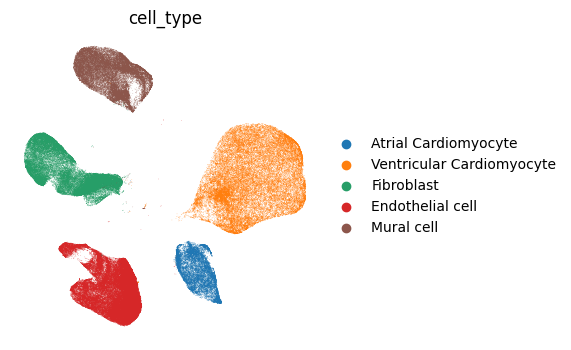

In [10]:
sc.pl.umap(adata, color='cell_type', frameon=False, show=False)
plt.savefig('../HEART/figures/umap_original.png', dpi=400, bbox_inches='tight')

# OVERVIEW

In [10]:
adata = adata[adata.obs['kit_10x'].isin(['Multiome-v1'])].copy()
adata

AnnData object with n_obs × n_vars = 74129 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'Tech'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_colors', '

In [2]:
obs_atac=pd.read_csv('objects/ATAC_obs.csv', index_col=0)
obs_atac

,sangerID,combinedID,donor,donor_type,region,region_finest,age,gender,facility,cell_or_nuclei,modality,kit_10x,flushed,batch_key,cell_type,cell_state
HCAHeartST10773166_HCAHeartST10781063_GCGGTTGGTCCGCTGT-1,HCAHeartST10773166,HCAHeartST10773166_HCAHeartST10781063,AH1,DCD,LV,LV FW ANTLAT ENDO,45-50,Female,Sanger,Nuclei,Multiome-RNA,Multiome-v1,yes,AH1_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM4
HCAHeartST10773166_HCAHeartST10781063_TGACTTCGTTTGGTTC-1,HCAHeartST10773166,HCAHeartST10773166_HCAHeartST10781063,AH1,DCD,LV,LV FW ANTLAT ENDO,45-50,Female,Sanger,Nuclei,Multiome-RNA,Multiome-v1,yes,AH1_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM4
HCAHeartST10773166_HCAHeartST10781063_GTTTCTAGTCAAAGGG-1,HCAHeartST10773166,HCAHeartST10773166_HCAHeartST10781063,AH1,DCD,LV,LV FW ANTLAT ENDO,45-50,Female,Sanger,Nuclei,Multiome-RNA,Multiome-v1,yes,AH1_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM4
HCAHeartST10773166_HCAHeartST10781063_TGGTTAATCTTAGTGA-1,HCAHeartST10773166,HCAHeartST10773166_HCAHeartST10781063,AH1,DCD,LV,LV FW ANTLAT ENDO,45-50,Female,Sanger,Nuclei,Multiome-RNA,Multiome-v1,yes,AH1_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM1
HCAHeartST10773166_HCAHeartST10781063_TAGTACGGTCATCAAG-1,HCAHeartST10773166,HCAHeartST10773166_HCAHeartST10781063,AH1,DCD,LV,LV FW ANTLAT ENDO,45-50,Female,Sanger,Nuclei,Multiome-RNA,Multiome-v1,yes,AH1_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCAHeartST10773171_HCAHeartST10781448_TTGGTGAGTACCGGAT-1,HCAHeartST10773171,HCAHeartST10773171_HCAHeartST10781448,AH1,DCD,AVN,AVN,45-50,Female,Sanger,Nuclei,Multiome-RNA,Multiome-v1,yes,AH1_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM1
HCAHeartST10773171_HCAHeartST10781448_ACTATCCGTACCGTTT-1,HCAHeartST10773171,HCAHeartST10773171_HCAHeartST10781448,AH1,DCD,AVN,AVN,45-50,Female,Sanger,Nuclei,Multiome-RNA,Multiome-v1,yes,AH1_Nuclei_Multiome-v1,Mural cell,PC2_atria
HCAHeartST10773171_HCAHeartST10781448_CTTCATCCAAGTGTCC-1,HCAHeartST10773171,HCAHeartST10773171_HCAHeartST10781448,AH1,DCD,AVN,AVN,45-50,Female,Sanger,Nuclei,Multiome-RNA,Multiome-v1,yes,AH1_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM1
HCAHeartST10773171_HCAHeartST10781448_AGCATCCCAACCGCCA-1,HCAHeartST10773171,HCAHeartST10773171_HCAHeartST10781448,AH1,DCD,AVN,AVN,45-50,Female,Sanger,Nuclei,Multiome-RNA,Multiome-v1,yes,AH1_Nuclei_Multiome-v1,Ventricular Cardiomyocyte,vCM2


In [13]:
obs_atac['modality'].value_counts()

modality
Multiome-RNA    139835
Name: count, dtype: int64

In [14]:
obs_atac['flushed'].value_counts()

flushed
yes    110756
no      29079
Name: count, dtype: int64

In [12]:
adata[adata.obs.index.isin(obs_atac.index)]

View of AnnData object with n_obs × n_vars = 139835 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_colors', 

In [11]:
obs_atac['batch_key'].value_counts()

batch_key
AH1_Nuclei_Multiome-v1     42193
A61_Nuclei_Multiome-v1     26195
D8_Nuclei_Multiome-v1      16011
AH2_Nuclei_Multiome-v1     15020
AV13_Nuclei_Multiome-v1    11709
D7_Nuclei_Multiome-v1      10840
AV14_Nuclei_Multiome-v1     7491
AV3_Nuclei_Multiome-v1      4254
AV10_Nuclei_Multiome-v1     3894
D3_Nuclei_Multiome-v1       2228
Name: count, dtype: int64

In [16]:
adata.obs['flushed'].value_counts()

flushed
no     366747
yes    337549
Name: count, dtype: int64

In [6]:
adata.obs['region'].value_counts()

region
LV     148429
RV     104454
AX     102221
SP      99024
LA      74501
SAN     69153
RA      57495
AVN     49019
Name: count, dtype: int64

In [11]:
adata.obs['cell_type'].value_counts()

cell_type
Ventricular Cardiomyocyte     190710
Fibroblast                    138055
Endothelial cell              131505
Mural cell                    104593
Myeloid                        51426
Atrial Cardiomyocyte           45911
Lymphoid                       24922
Neural cell                     6622
Adipocyte                       6347
Mast cell                       1853
Lymphatic Endothelial cell      1295
Mesothelial cell                1057
Name: count, dtype: int64

In [4]:
print(adata.obs.groupby(['batch'])['region'].value_counts())

batch                   region
A61_Nuclei_Multiome-v1  AVN       20995
                        SAN       13612
                        AX            0
                        LA            0
                        LV            0
                                  ...  
H7_Nuclei_3prime-v3     SP         3886
                        AX         3443
                        RA         1466
                        AVN           0
                        SAN           0
Name: count, Length: 256, dtype: int64


/tmp/ipykernel_33331/1756111201.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(adata.obs.groupby(['batch'])['region'].value_counts())


In [14]:
adata.obs['kit_10x'].value_counts()

kit_10x
3prime-v3      257029
3prime-v2      236207
Multiome-v1    211060
Name: count, dtype: int64

In [6]:
adata.obs['batch'].value_counts()

batch
AH1_Nuclei_Multiome-v1     55785
D11_Cell_3prime-v3         45964
D2_Nuclei_3prime-v2        45050
H5_Nuclei_3prime-v3        38177
D6_Cell_3prime-v2          36677
A61_Nuclei_Multiome-v1     34607
D8_Nuclei_Multiome-v1      33554
H3_Nuclei_3prime-v3        32266
H7_Nuclei_3prime-v3        31676
AH2_Nuclei_Multiome-v1     27849
H6_Nuclei_3prime-v3        27431
D4_Nuclei_3prime-v2        26773
H4_Nuclei_3prime-v3        25707
D5_Nuclei_3prime-v2        22564
D3_Nuclei_3prime-v2        22271
H2_Nuclei_3prime-v3        21396
D6_Cell_3prime-v3          20568
AV13_Nuclei_Multiome-v1    18886
D7_Cell_3prime-v2          18528
D6_Nuclei_3prime-v2        17946
D7_Nuclei_3prime-v2        16904
D1_Nuclei_3prime-v2        15533
D7_Nuclei_Multiome-v1      13925
D11_Nuclei_3prime-v3       13844
AV14_Nuclei_Multiome-v1    10624
AV3_Nuclei_Multiome-v1      7388
D5_Cell_3prime-v2           6647
AV10_Nuclei_Multiome-v1     5757
D3_Cell_3prime-v2           5364
D3_Nuclei_Multiome-v1       2685
D4_C

batch_key
AH1_Nuclei_Multiome-v1     55785
D11_Cell_3prime-v3         45964
D2_Nuclei_3prime-v2        45050
H5_Nuclei_3prime-v3        38177
D6_Cell_3prime-v2          36677
A61_Nuclei_Multiome-v1     34607
D8_Nuclei_Multiome-v1      33554
H3_Nuclei_3prime-v3        32266
H7_Nuclei_3prime-v3        31676
AH2_Nuclei_Multiome-v1     27849
H6_Nuclei_3prime-v3        27431
D4_Nuclei_3prime-v2        26773
H4_Nuclei_3prime-v3        25707
D5_Nuclei_3prime-v2        22564
D3_Nuclei_3prime-v2        22271
H2_Nuclei_3prime-v3        21396
D6_Cell_3prime-v3          20568
AV13_Nuclei_Multiome-v1    18886
D7_Cell_3prime-v2          18528
D6_Nuclei_3prime-v2        17946
D7_Nuclei_3prime-v2        16904
D1_Nuclei_3prime-v2        15533
D7_Nuclei_Multiome-v1      13925
D11_Nuclei_3prime-v3       13844
AV14_Nuclei_Multiome-v1    10624
AV3_Nuclei_Multiome-v1      7388
D5_Cell_3prime-v2           6647
AV10_Nuclei_Multiome-v1     5757
D3_Cell_3prime-v2           5364
D3_Nuclei_Multiome-v1       2685


/home/macera/.conda/envs/deepscore/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


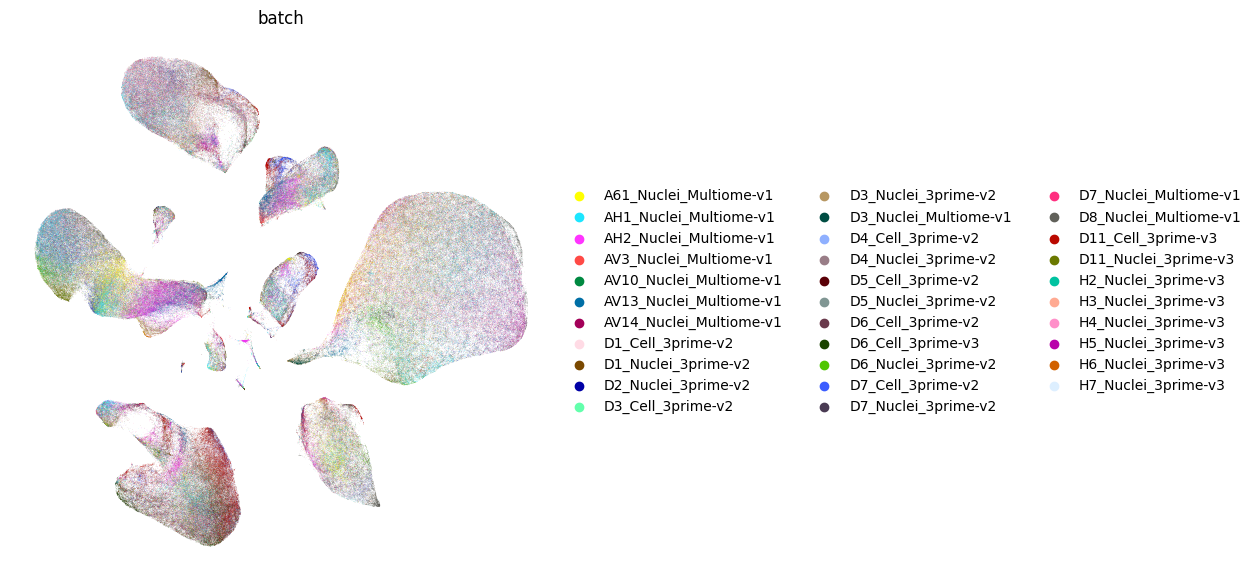

In [18]:
sc.pl.umap(adata, color='batch', frameon=False)

In [ ]:
import numpy as np
import pandas as pd
from typing import List, Optional, Tuple, Dict

# -------------------------------
# 1) Construcción de la tabla
# -------------------------------

def build_prepost_table_from_obs(
    adata,
    *,
    metric_base: str,                  # "silhouette" | "binary_lisi"
    label_key: str,                    # e.g., "scOMM_Celltype" | "scOMM_Cellstate"
    tech_key: str = "Tech",
    tech_list: List[str] = (),
    include_pre_all: bool = True,
    min_cells: int = 10,
    drop_empty_labels: bool = True,
) -> Tuple[pd.DataFrame, pd.DataFrame, Dict[str, str]]:
    """
    Construye una matriz PRE/POST intercalada a partir de columnas en `adata.obs`
    siguiendo los patrones de nombre acordados.

    Columnas de salida (en este orden):
      [ PRE_<tech1>, POST_<tech1>, PRE_<tech2>, POST_<tech2>, ..., (opcional) PRE_ALL ]

    Para cada celda (label, columna) se calcula la media de la métrica sobre
    el subconjunto correspondiente y se registra el número de celdas (counts).
    Si counts < min_cells, el valor se pone a NaN.

    Devuelve:
      - matrix: DataFrame (rows = labels, cols = columnas PRE/POST intercaladas)
      - counts: DataFrame del mismo shape con números de celdas usados
      - used_cols: dict con los nombres de columnas de `adata.obs` realmente usados:
           {
             "PRE__<tech>": "<obs_col_name>",
             "POST__<tech>": "<obs_col_name>",
             "PRE__ALL": "<obs_col_name>" (si aplica)
           }
    """
    obs = adata.obs
    if label_key not in obs.columns:
        raise KeyError(f"'{label_key}' not in adata.obs")
    if tech_key not in obs.columns:
        raise KeyError(f"'{tech_key}' not in adata.obs")

    # Resolver nombres esperados en adata.obs
    def pre_col_name(tech: str) -> str:
        return f"{metric_base}__PRE__Tech_{tech}_Pop_all__{label_key}"

    def post_col_name_for_tech(tech: str) -> str:
        return f"{metric_base}__POST__Tech_all_Pop_all__{label_key}__Tech={tech}"

    def pre_all_col_name() -> str:
        return f"{metric_base}__PRE__Tech_all_Pop_all__{label_key}"

    # Labels ordenadas (categorical si existe)
    labels = obs[label_key]
    if pd.api.types.is_categorical_dtype(labels):
        row_index = list(labels.cat.categories)
    else:
        row_index = sorted(pd.unique(labels.astype(str)))

    # Crear contenedores
    cols_vals = []
    cols_cnts = []
    used_cols: Dict[str, str] = {}

    # Construir pares intercalados PRE/POST por tecnología
    for tech in tech_list:
        # Máscaras por tecnología y por label se aplican al agregar.
        # PRE_<tech>
        pre_obs_col = pre_col_name(tech)
        if pre_obs_col in obs.columns:
            used_cols[f"PRE__{tech}"] = pre_obs_col
            pre_series = obs[pre_obs_col]
        else:
            used_cols[f"PRE__{tech}"] = None
            pre_series = pd.Series(np.nan, index=obs.index, name=pre_obs_col)

        # POST_<tech>
        post_obs_col = post_col_name_for_tech(tech)
        if post_obs_col in obs.columns:
            used_cols[f"POST__{tech}"] = post_obs_col
            post_series = obs[post_obs_col]
        else:
            used_cols[f"POST__{tech}"] = None
            post_series = pd.Series(np.nan, index=obs.index, name=post_obs_col)

        # Agregaciones por label para PRE y POST (sólo celdas de esa tecnología)
        tech_mask = (obs[tech_key].astype(str) == str(tech))

        def agg_by_label(series: pd.Series, label_values: pd.Series) -> Tuple[pd.Series, pd.Series]:
            # filtra por tech y elimina NaN (métrica puede ser NaN fuera del subset original)
            s = series[tech_mask]
            lv = label_values[tech_mask]
            grp = pd.concat({"val": s, "lab": lv}, axis=1).dropna(subset=["val"])
            if grp.empty:
                mean = pd.Series(np.nan, index=row_index, name=None)
                cnt = pd.Series(0, index=row_index, name=None, dtype=int)
                return mean, cnt
            mean = grp.groupby("lab", observed=True)["val"].mean()
            cnt = grp.groupby("lab", observed=True)["val"].size().astype(int)
            # reindex a todas las labels (rellena NaN / 0)
            mean = mean.reindex(row_index)
            cnt = cnt.reindex(row_index).fillna(0).astype(int)
            # aplicar min_cells
            mean = mean.mask(cnt < min_cells, np.nan)
            cnt = cnt.mask(cnt < min_cells, np.nan)
            return mean, cnt

        pre_mean, pre_cnt = agg_by_label(pre_series, labels)
        post_mean, post_cnt = agg_by_label(post_series, labels)

        cols_vals.append(pre_mean.rename(f"PRE_{tech}"))
        cols_cnts.append(pre_cnt.rename(f"PRE_{tech}"))
        cols_vals.append(post_mean.rename(f"POST_{tech}"))
        cols_cnts.append(post_cnt.rename(f"POST_{tech}"))

    # PRE_ALL (al final)
    if include_pre_all:
        pre_all_col = pre_all_col_name()
        if pre_all_col in obs.columns:
            used_cols["PRE__ALL"] = pre_all_col
            series = obs[pre_all_col]
            grp = pd.concat({"val": series, "lab": labels}, axis=1).dropna(subset=["val"])
            if grp.empty:
                pre_all_mean = pd.Series(np.nan, index=row_index, name="PRE_ALL")
                pre_all_cnt = pd.Series(np.nan, index=row_index, name="PRE_ALL")
            else:
                pre_all_mean = grp.groupby("lab", observed=True)["val"].mean().reindex(row_index)
                pre_all_cnt = grp.groupby("lab", observed=True)["val"].size().reindex(row_index).astype(float)
                # min_cells global (across ALL techs previos a integración)
                pre_all_mean = pre_all_mean.mask(pre_all_cnt < min_cells, np.nan)
                pre_all_cnt = pre_all_cnt.mask(pre_all_cnt < min_cells, np.nan)
        else:
            used_cols["PRE__ALL"] = None
            pre_all_mean = pd.Series(np.nan, index=row_index, name="PRE_ALL")
            pre_all_cnt = pd.Series(np.nan, index=row_index, name="PRE_ALL")

        cols_vals.append(pre_all_mean.rename("PRE_ALL"))
        cols_cnts.append(pre_all_cnt.rename("PRE_ALL"))

    # Construir matrices finales
    matrix = pd.concat(cols_vals, axis=1)
    counts = pd.concat(cols_cnts, axis=1)

    # Opcional: eliminar filas sin datos
    if drop_empty_labels:
        all_nan = matrix.isna().all(axis=1)
        matrix = matrix.loc[~all_nan]
        counts = counts.loc[~all_nan]

    return matrix, counts, used_cols


# -------------------------------
# 2) Heatmap
# -------------------------------

def plot_metric_heatmap(
    matrix: pd.DataFrame,
    counts: Optional[pd.DataFrame] = None,
    *,
    metric_base: str = "silhouette",   # "silhouette" | "binary_lisi"
    title: Optional[str] = None,
    annotate: bool = True,
    fmt: str = ".2f",
    figsize_scale: float = 0.6,
):
    """
    Dibuja un heatmap a partir de la matriz construida arriba.
    - 'silhouette' usa escala [-1, 1] centrada en 0.
    - 'binary_lisi' usa escala [0, 1].
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    mat = matrix.copy()
    if metric_base.lower() == "silhouette":
        vmin, vmax, center, cmap, cbar = -1.0, 1.0, 0.0, "vlag", "Mean silhouette"
    else:
        vmin, vmax, center, cmap, cbar = 0.0, 1.0, None, "mako", "Mean binary LISI"

    plt.figure(figsize=(max(8, 1 + figsize_scale * mat.shape[1]), max(6, 0.4 * mat.shape[0])))
    ax = sns.heatmap(
        mat, cmap=cmap, vmin=vmin, vmax=vmax, center=center,
        annot=False, linewidths=0.5, linecolor="white",
        cbar_kws={"label": cbar}
    )
    if title:
        ax.set_title(title, fontsize=12)

    if annotate:
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                val = mat.iat[i, j]
                if np.isfinite(val):
                    text = format(val, fmt)
                    if counts is not None and counts.shape == mat.shape:
                        n = counts.iat[i, j]
                        if pd.notna(n):
                            text = f"{text}\n(n={int(n)})"
                    ax.text(j + 0.5, i + 0.5, text,
                            ha="center", va="center", fontsize=8, color="black")

    plt.xticks(rotation=45, ha="right"); plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


/home/macera/.conda/envs/deepscore/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


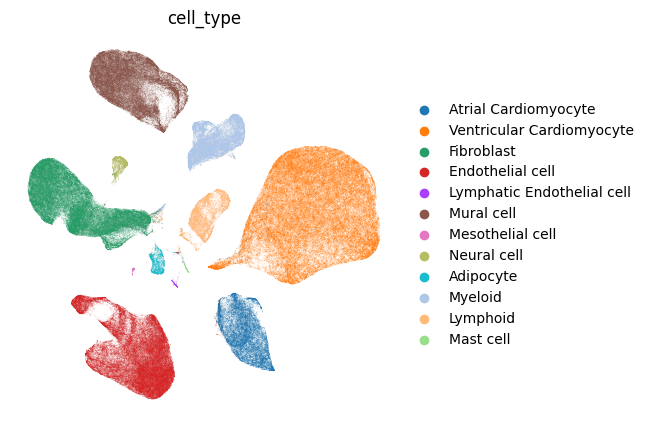

In [ ]:
sc.pl.umap(adata, color='cell_type', frameon=False)

Endothelial cell


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


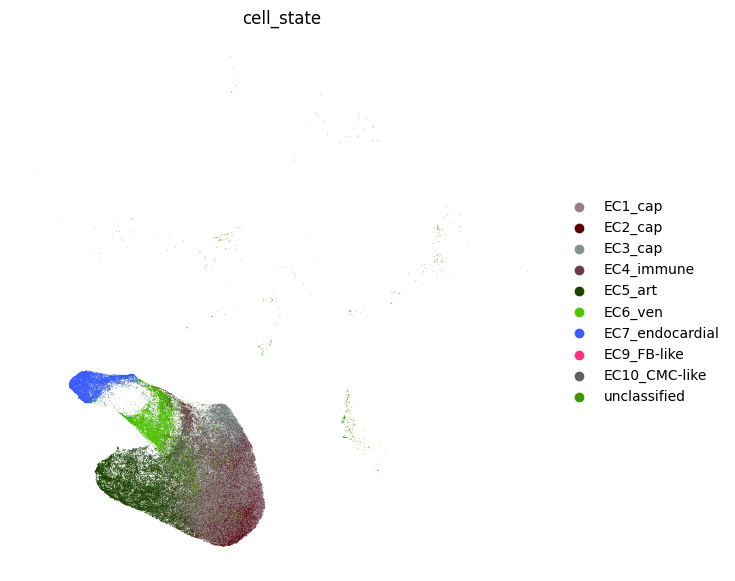

Mural cell


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


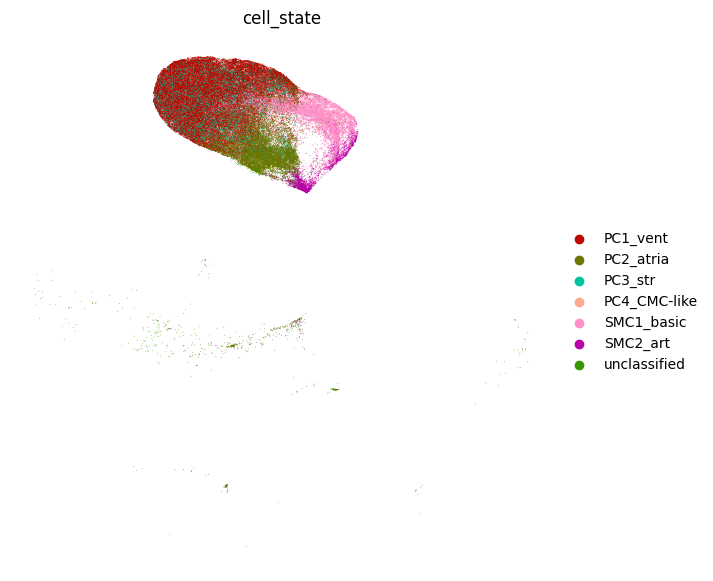

Myeloid


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


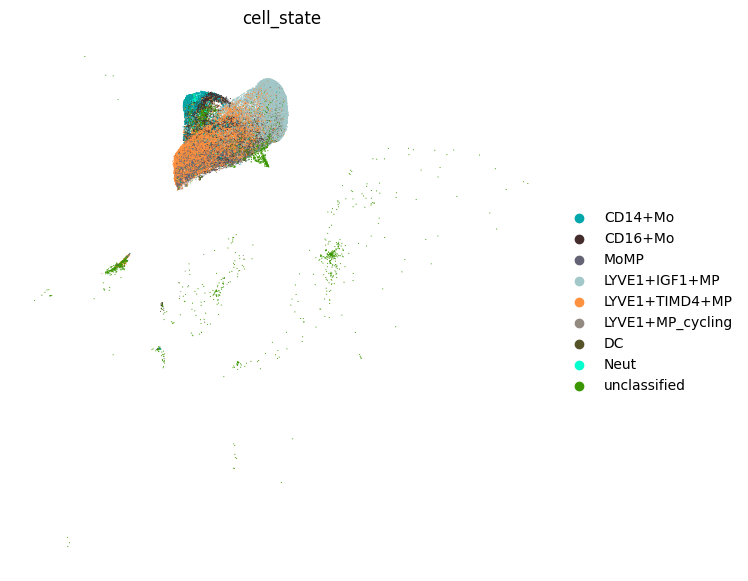

Fibroblast


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


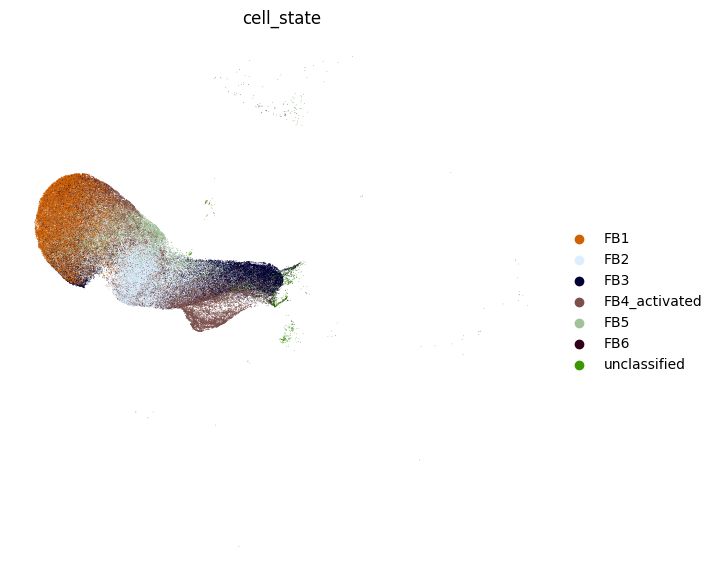

Lymphoid


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


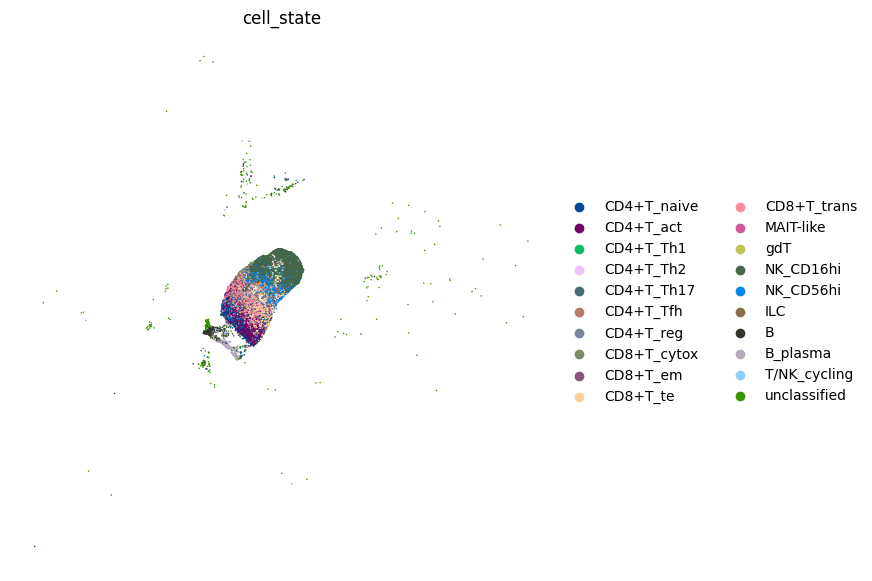

Neural cell


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


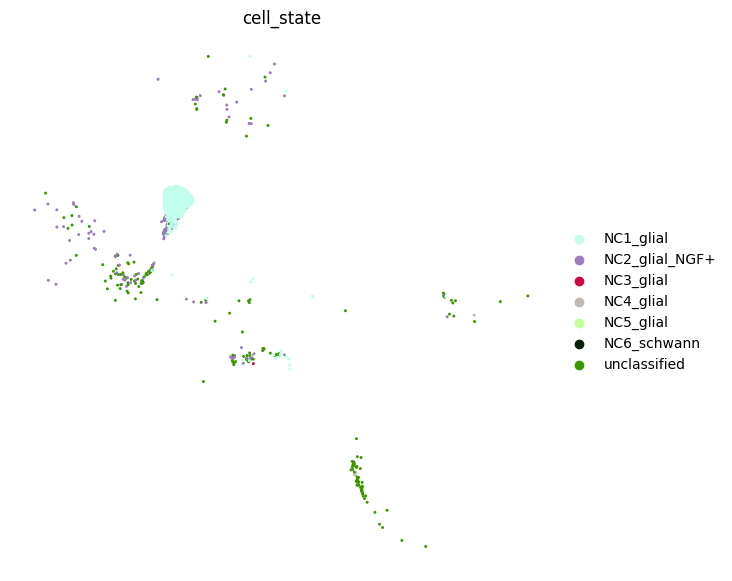

Ventricular Cardiomyocyte


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


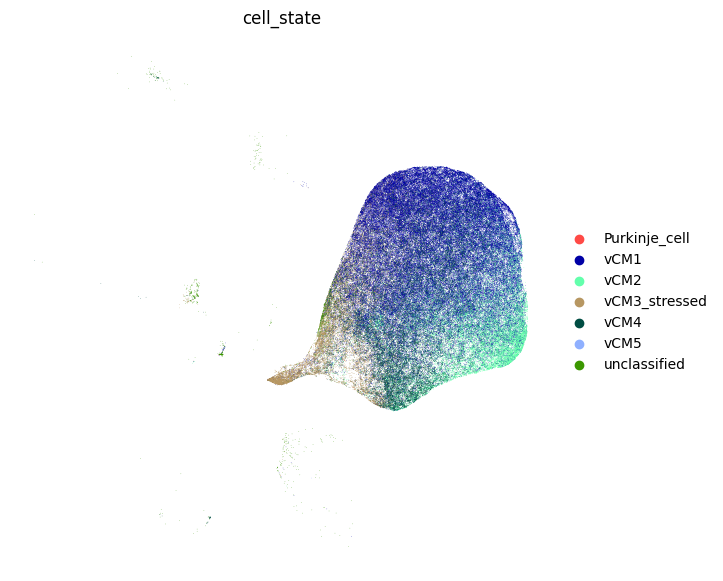

Lymphatic Endothelial cell


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


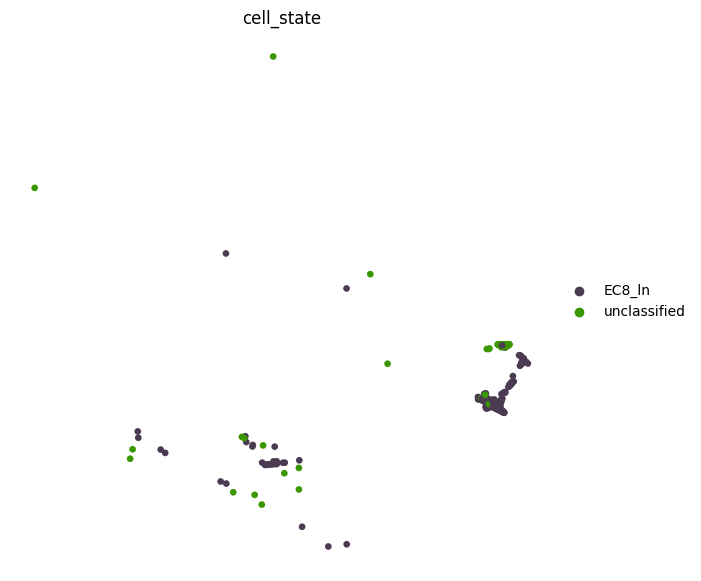

Mesothelial cell


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


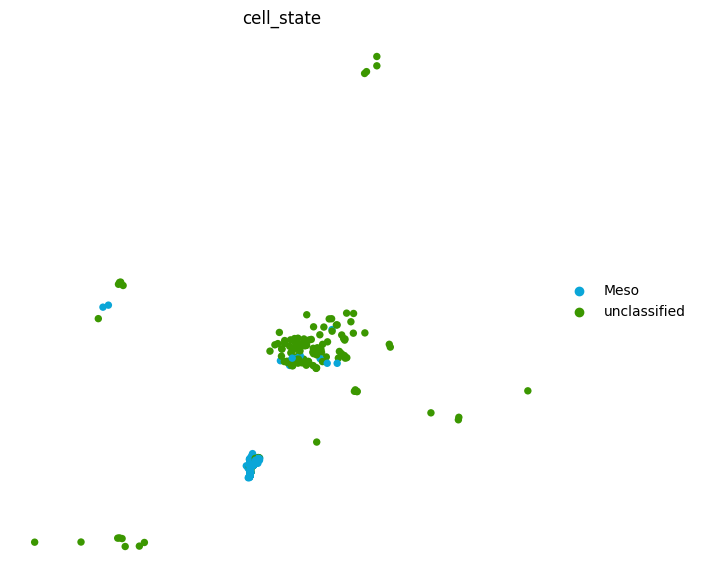

Atrial Cardiomyocyte


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


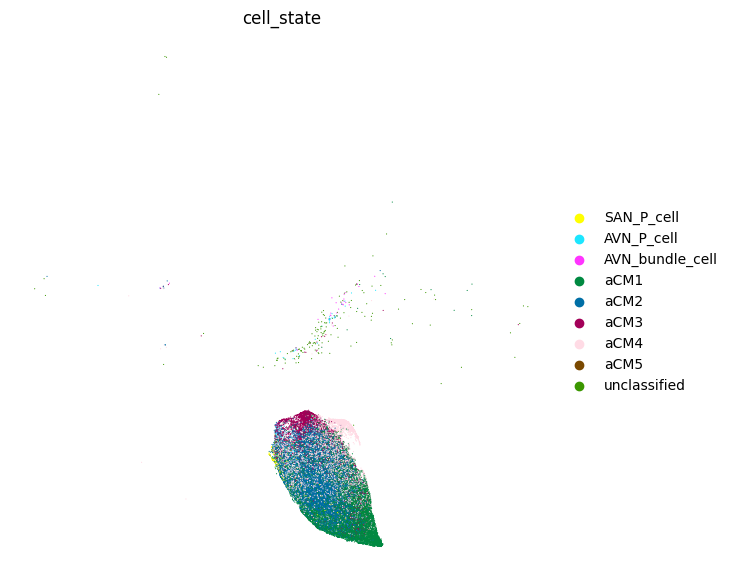

Mast cell


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


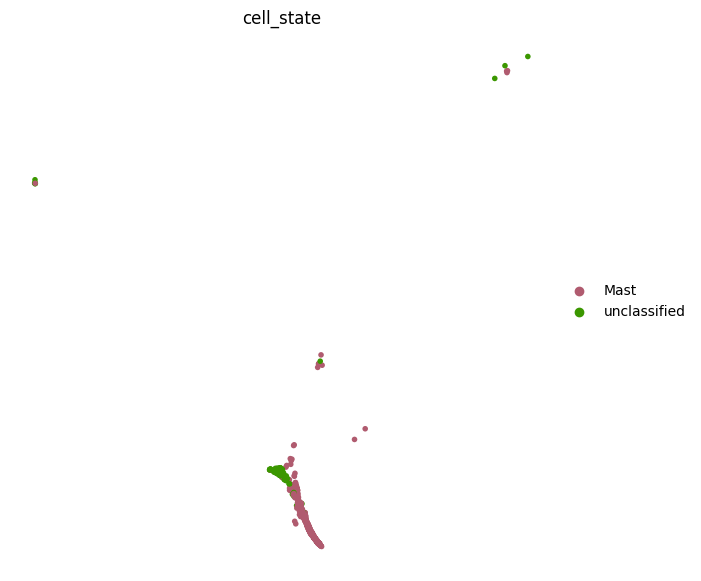

Adipocyte


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


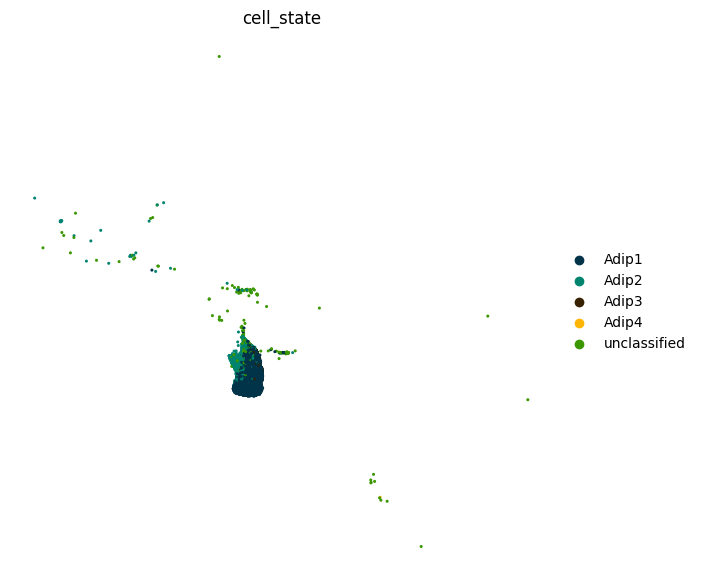

In [ ]:
for i in adata.obs['cell_type'].unique():
    print(i)
    sc.pl.umap(adata[adata.obs['cell_type'].isin([i])], color=['cell_state'], frameon=False, ncols=1)

In [ ]:
import numpy as np
import pandas as pd
from typing import List, Optional, Tuple, Dict

# -------------------------------
# 1) Construcción de la tabla
# -------------------------------

def build_prepost_table_from_obs(
    adata,
    *,
    metric_base: str,                  # "silhouette" | "binary_lisi"
    label_key: str,                    # e.g., "scOMM_Celltype" | "scOMM_Cellstate"
    tech_key: str = "Tech",
    tech_list: List[str] = (),
    include_pre_all: bool = True,
    min_cells: int = 10,
    drop_empty_labels: bool = True,
) -> Tuple[pd.DataFrame, pd.DataFrame, Dict[str, str]]:
    """
    Construye una matriz PRE/POST intercalada a partir de columnas en `adata.obs`
    siguiendo los patrones de nombre acordados.

    Columnas de salida (en este orden):
      [ PRE_<tech1>, POST_<tech1>, PRE_<tech2>, POST_<tech2>, ..., (opcional) PRE_ALL ]

    Para cada celda (label, columna) se calcula la media de la métrica sobre
    el subconjunto correspondiente y se registra el número de celdas (counts).
    Si counts < min_cells, el valor se pone a NaN.

    Devuelve:
      - matrix: DataFrame (rows = labels, cols = columnas PRE/POST intercaladas)
      - counts: DataFrame del mismo shape con números de celdas usados
      - used_cols: dict con los nombres de columnas de `adata.obs` realmente usados:
           {
             "PRE__<tech>": "<obs_col_name>",
             "POST__<tech>": "<obs_col_name>",
             "PRE__ALL": "<obs_col_name>" (si aplica)
           }
    """
    obs = adata.obs
    if label_key not in obs.columns:
        raise KeyError(f"'{label_key}' not in adata.obs")
    if tech_key not in obs.columns:
        raise KeyError(f"'{tech_key}' not in adata.obs")

    # Resolver nombres esperados en adata.obs
    def pre_col_name(tech: str) -> str:
        return f"{metric_base}__PRE__Tech_{tech}_Pop_all__{label_key}"

    def post_col_name_for_tech(tech: str) -> str:
        return f"{metric_base}__POST__Tech_all_Pop_all__{label_key}__Tech={tech}"

    def pre_all_col_name() -> str:
        return f"{metric_base}__PRE__Tech_all_Pop_all__{label_key}"

    # Labels ordenadas (categorical si existe)
    labels = obs[label_key]
    if pd.api.types.is_categorical_dtype(labels):
        row_index = list(labels.cat.categories)
    else:
        row_index = sorted(pd.unique(labels.astype(str)))

    # Crear contenedores
    cols_vals = []
    cols_cnts = []
    used_cols: Dict[str, str] = {}

    # Construir pares intercalados PRE/POST por tecnología
    for tech in tech_list:
        # Máscaras por tecnología y por label se aplican al agregar.
        # PRE_<tech>
        pre_obs_col = pre_col_name(tech)
        if pre_obs_col in obs.columns:
            used_cols[f"PRE__{tech}"] = pre_obs_col
            pre_series = obs[pre_obs_col]
        else:
            used_cols[f"PRE__{tech}"] = None
            pre_series = pd.Series(np.nan, index=obs.index, name=pre_obs_col)

        # POST_<tech>
        post_obs_col = post_col_name_for_tech(tech)
        if post_obs_col in obs.columns:
            used_cols[f"POST__{tech}"] = post_obs_col
            post_series = obs[post_obs_col]
        else:
            used_cols[f"POST__{tech}"] = None
            post_series = pd.Series(np.nan, index=obs.index, name=post_obs_col)

        # Agregaciones por label para PRE y POST (sólo celdas de esa tecnología)
        tech_mask = (obs[tech_key].astype(str) == str(tech))

        def agg_by_label(series: pd.Series, label_values: pd.Series) -> Tuple[pd.Series, pd.Series]:
            # filtra por tech y elimina NaN (métrica puede ser NaN fuera del subset original)
            s = series[tech_mask]
            lv = label_values[tech_mask]
            grp = pd.concat({"val": s, "lab": lv}, axis=1).dropna(subset=["val"])
            if grp.empty:
                mean = pd.Series(np.nan, index=row_index, name=None)
                cnt = pd.Series(0, index=row_index, name=None, dtype=int)
                return mean, cnt
            mean = grp.groupby("lab", observed=True)["val"].mean()
            cnt = grp.groupby("lab", observed=True)["val"].size().astype(int)
            # reindex a todas las labels (rellena NaN / 0)
            mean = mean.reindex(row_index)
            cnt = cnt.reindex(row_index).fillna(0).astype(int)
            # aplicar min_cells
            mean = mean.mask(cnt < min_cells, np.nan)
            cnt = cnt.mask(cnt < min_cells, np.nan)
            return mean, cnt

        pre_mean, pre_cnt = agg_by_label(pre_series, labels)
        post_mean, post_cnt = agg_by_label(post_series, labels)

        cols_vals.append(pre_mean.rename(f"PRE_{tech}"))
        cols_cnts.append(pre_cnt.rename(f"PRE_{tech}"))
        cols_vals.append(post_mean.rename(f"POST_{tech}"))
        cols_cnts.append(post_cnt.rename(f"POST_{tech}"))

    # PRE_ALL (al final)
    if include_pre_all:
        pre_all_col = pre_all_col_name()
        if pre_all_col in obs.columns:
            used_cols["PRE__ALL"] = pre_all_col
            series = obs[pre_all_col]
            grp = pd.concat({"val": series, "lab": labels}, axis=1).dropna(subset=["val"])
            if grp.empty:
                pre_all_mean = pd.Series(np.nan, index=row_index, name="PRE_ALL")
                pre_all_cnt = pd.Series(np.nan, index=row_index, name="PRE_ALL")
            else:
                pre_all_mean = grp.groupby("lab", observed=True)["val"].mean().reindex(row_index)
                pre_all_cnt = grp.groupby("lab", observed=True)["val"].size().reindex(row_index).astype(float)
                # min_cells global (across ALL techs previos a integración)
                pre_all_mean = pre_all_mean.mask(pre_all_cnt < min_cells, np.nan)
                pre_all_cnt = pre_all_cnt.mask(pre_all_cnt < min_cells, np.nan)
        else:
            used_cols["PRE__ALL"] = None
            pre_all_mean = pd.Series(np.nan, index=row_index, name="PRE_ALL")
            pre_all_cnt = pd.Series(np.nan, index=row_index, name="PRE_ALL")

        cols_vals.append(pre_all_mean.rename("PRE_ALL"))
        cols_cnts.append(pre_all_cnt.rename("PRE_ALL"))

    # Construir matrices finales
    matrix = pd.concat(cols_vals, axis=1)
    counts = pd.concat(cols_cnts, axis=1)

    # Opcional: eliminar filas sin datos
    if drop_empty_labels:
        all_nan = matrix.isna().all(axis=1)
        matrix = matrix.loc[~all_nan]
        counts = counts.loc[~all_nan]

    return matrix, counts, used_cols


# -------------------------------
# 2) Heatmap
# -------------------------------

def plot_metric_heatmap(
    matrix: pd.DataFrame,
    counts: Optional[pd.DataFrame] = None,
    *,
    metric_base: str = "silhouette",   # "silhouette" | "binary_lisi"
    title: Optional[str] = None,
    annotate: bool = True,
    fmt: str = ".2f",
    figsize_scale: float = 0.6,
):
    """
    Dibuja un heatmap a partir de la matriz construida arriba.
    - 'silhouette' usa escala [-1, 1] centrada en 0.
    - 'binary_lisi' usa escala [0, 1].
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    mat = matrix.copy()
    if metric_base.lower() == "silhouette":
        vmin, vmax, center, cmap, cbar = -1.0, 1.0, 0.0, "vlag", "Mean silhouette"
    else:
        vmin, vmax, center, cmap, cbar = 0.0, 1.0, None, "mako", "Mean binary LISI"

    plt.figure(figsize=(max(8, 1 + figsize_scale * mat.shape[1]), max(6, 0.4 * mat.shape[0])))
    ax = sns.heatmap(
        mat, cmap=cmap, vmin=vmin, vmax=vmax, center=center,
        annot=False, linewidths=0.5, linecolor="white",
        cbar_kws={"label": cbar}
    )
    if title:
        ax.set_title(title, fontsize=12)

    if annotate:
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                val = mat.iat[i, j]
                if np.isfinite(val):
                    text = format(val, fmt)
                    if counts is not None and counts.shape == mat.shape:
                        n = counts.iat[i, j]
                        if pd.notna(n):
                            text = f"{text}\n(n={int(n)})"
                    ax.text(j + 0.5, i + 0.5, text,
                            ha="center", va="center", fontsize=8, color="black")

    plt.xticks(rotation=45, ha="right"); plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [18]:
adata.obs['cell_type'].unique()

['Endothelial cell', 'Mural cell', 'Myeloid', 'Fibroblast', 'Lymphoid', ..., 'Lymphatic Endothelial cell', 'Mesothelial cell', 'Atrial Cardiomyocyte', 'Mast cell', 'Adipocyte']
Length: 12
Categories (12, object): ['Atrial Cardiomyocyte', 'Ventricular Cardiomyocyte', 'Fibroblast', 'Endothelial cell', ..., 'Adipocyte', 'Myeloid', 'Lymphoid', 'Mast cell']

In [5]:
## ATLAS SUBSET


adata = adata[adata.obs['cell_type'].isin(['Endothelial cell', 'Mural cell','Fibroblast', 'Atrial Cardiomyocyte', 'Ventricular Cardiomyocyte'])]

adata = adata[~adata.obs['cell_state'].isin(['unclassified'])]

adata

View of AnnData object with n_obs × n_vars = 604126 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_colors', 

Endothelial cell


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


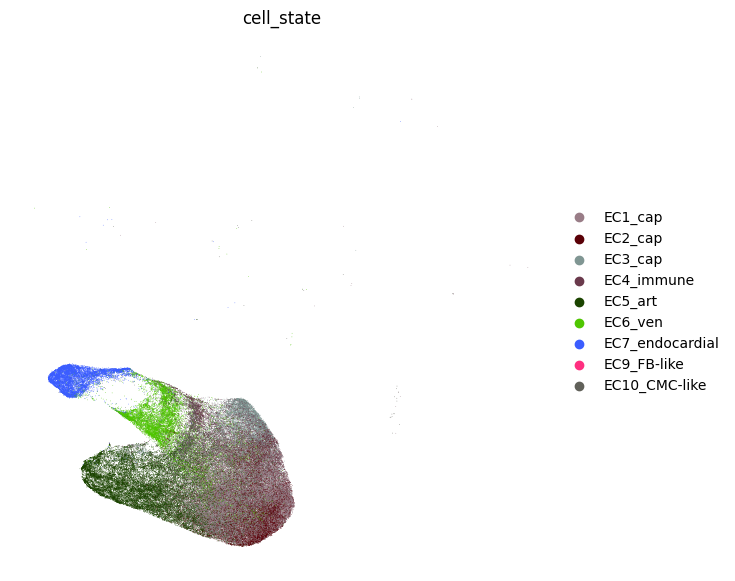

Mural cell


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


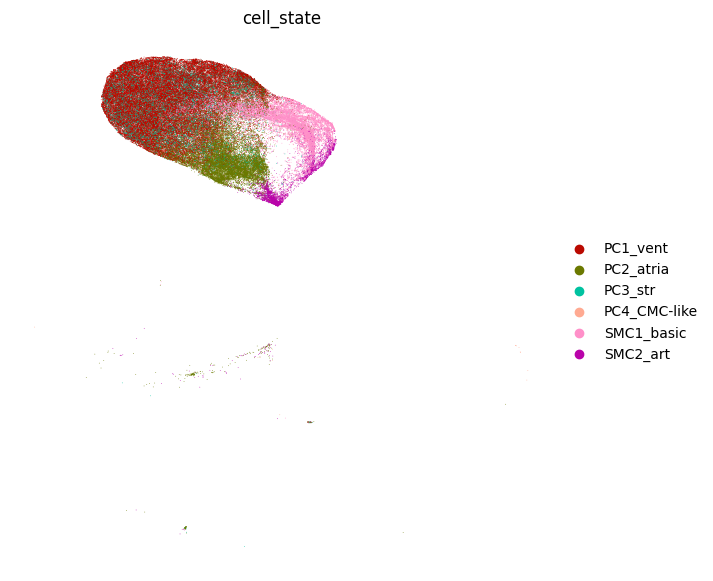

Fibroblast


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


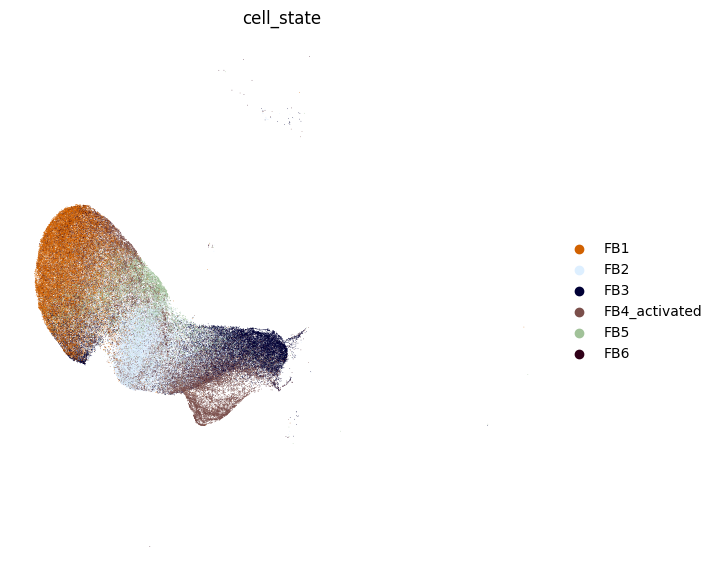

Atrial Cardiomyocyte


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


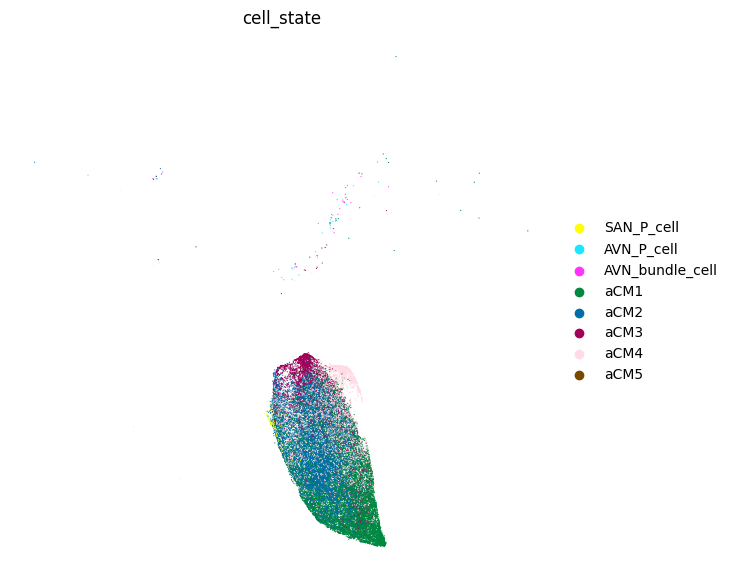

Ventricular Cardiomyocyte


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


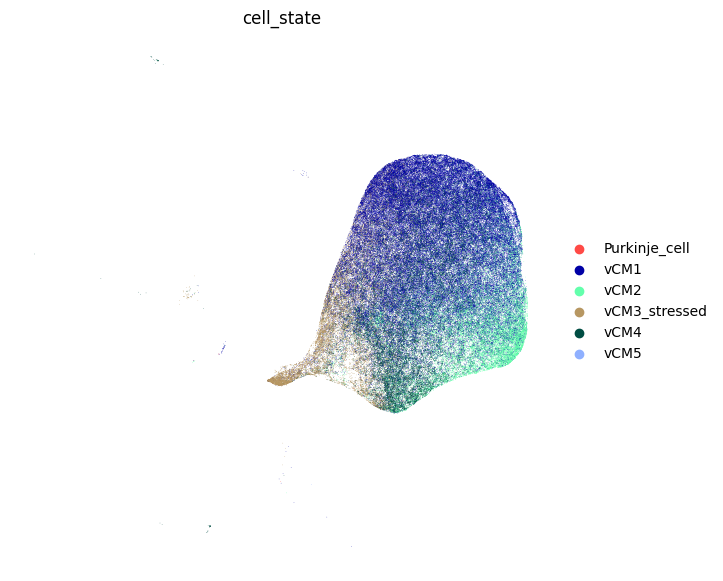

In [4]:
for i in adata.obs['cell_type'].unique():
    print(i)
    sc.pl.umap(adata[adata.obs['cell_type'].isin([i])], color=['cell_state'], frameon=False, ncols=1)

In [5]:
adata.obs.groupby('kit_10x')['cell_state'].value_counts()['Multiome-v1']

/tmp/ipykernel_41346/2174238352.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('kit_10x')['cell_state'].value_counts()['Multiome-v1']


cell_state
vCM1               18795
FB2                17299
FB4_activated      17279
vCM4               16894
FB3                13906
aCM2                9083
EC7_endocardial     5834
FB5                 5813
vCM2                5709
FB1                 5272
PC2_atria           5118
aCM1                5004
EC5_art             4560
vCM3_stressed       4544
EC1_cap             3979
EC6_ven             3799
PC1_vent            3771
aCM4                3388
PC3_str             3384
EC10_CMC-like       3110
FB6                 2585
EC4_immune          2087
aCM3                1462
EC3_cap             1176
SMC1_basic           977
EC2_cap              895
SMC2_art             859
SAN_P_cell           245
AVN_P_cell           155
PC4_CMC-like          44
AVN_bundle_cell       38
Purkinje_cell         27
vCM5                  10
aCM5                   0
EC9_FB-like            0
Name: count, dtype: int64

In [6]:
adata.obs.groupby('kit_10x')['cell_state'].value_counts()['3prime-v2']

/tmp/ipykernel_41346/602199096.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('kit_10x')['cell_state'].value_counts()['3prime-v2']


cell_state
vCM1               31459
FB1                20695
PC1_vent           18970
EC1_cap            12211
FB2                10453
vCM2               10197
EC5_art             9581
vCM3_stressed       9012
EC3_cap             8251
aCM1                8244
vCM4                7795
EC2_cap             7316
FB4_activated       6974
PC3_str             5793
FB3                 5263
SMC1_basic          4858
EC6_ven             4188
aCM2                3916
EC7_endocardial     3831
FB5                 3829
PC2_atria           3604
aCM4                2275
aCM3                2014
EC4_immune          1797
SMC2_art            1600
EC10_CMC-like        804
FB6                  705
PC4_CMC-like         229
vCM5                 103
Purkinje_cell         54
aCM5                  31
EC9_FB-like            8
SAN_P_cell             0
AVN_P_cell             0
AVN_bundle_cell        0
Name: count, dtype: int64

In [7]:
adata.obs.groupby('kit_10x')['cell_state'].value_counts()['3prime-v3']

/tmp/ipykernel_41346/2420638248.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('kit_10x')['cell_state'].value_counts()['3prime-v3']


cell_state
vCM1               47576
PC1_vent           32312
vCM2               18786
EC1_cap            15716
vCM3_stressed      13365
FB1                12742
EC5_art            12417
SMC1_basic          9302
EC3_cap             9016
PC2_atria           7594
EC2_cap             6955
EC6_ven             5206
aCM1                5021
EC4_immune          4883
FB2                 4475
vCM4                4035
FB3                 3735
PC3_str             2970
FB4_activated       2561
aCM3                2225
EC10_CMC-like       1879
SMC2_art            1761
FB5                 1563
aCM2                1453
aCM4                1066
EC7_endocardial      870
FB6                  784
PC4_CMC-like         507
vCM5                 120
Purkinje_cell         29
aCM5                  24
EC9_FB-like           17
SAN_P_cell             0
AVN_P_cell             0
AVN_bundle_cell        0
Name: count, dtype: int64

In [66]:
adata.obs['batch_key'].value_counts()

batch_key
D11_Cell_3prime-v3         37654
D2_Nuclei_3prime-v2        27909
D6_Cell_3prime-v2          27609
AH1_Nuclei_Multiome-v1     27049
D8_Nuclei_Multiome-v1      20393
D6_Cell_3prime-v3          19738
A61_Nuclei_Multiome-v1     18948
AH2_Nuclei_Multiome-v1     17908
H7_Nuclei_3prime-v3        16797
D4_Nuclei_3prime-v2        16588
H3_Nuclei_3prime-v3        16514
D3_Nuclei_3prime-v2        14940
H5_Nuclei_3prime-v3        14408
H4_Nuclei_3prime-v3        13005
D5_Nuclei_3prime-v2        12397
H2_Nuclei_3prime-v3        11295
H6_Nuclei_3prime-v3        10546
D6_Nuclei_3prime-v2        10269
AV13_Nuclei_Multiome-v1     9800
D7_Nuclei_Multiome-v1       9534
D7_Cell_3prime-v2           9531
D7_Nuclei_3prime-v2         9015
AV14_Nuclei_Multiome-v1     8821
D11_Nuclei_3prime-v3        7097
D1_Nuclei_3prime-v2         6999
D5_Cell_3prime-v2           6128
D3_Cell_3prime-v2           4467
AV3_Nuclei_Multiome-v1      4081
AV10_Nuclei_Multiome-v1     3775
D4_Cell_3prime-v2           1426


In [8]:
for i in adata.obs['cell_type'].unique():
    print(i)
    print(adata[adata.obs['cell_type'].isin([i])].obs['cell_state'].unique().tolist())

Endothelial cell
['EC5_art', 'EC6_ven', 'EC2_cap', 'EC4_immune', 'EC3_cap', 'EC1_cap', 'EC7_endocardial', 'EC10_CMC-like', 'EC9_FB-like']
Mural cell
['SMC2_art', 'PC2_atria', 'SMC1_basic', 'PC1_vent', 'PC3_str', 'PC4_CMC-like']
Fibroblast
['FB4_activated', 'FB3', 'FB1', 'FB5', 'FB2', 'FB6']
Atrial Cardiomyocyte
['aCM4', 'aCM1', 'aCM3', 'aCM2', 'aCM5', 'SAN_P_cell', 'AVN_bundle_cell', 'AVN_P_cell']
Ventricular Cardiomyocyte
['vCM4', 'vCM1', 'vCM2', 'vCM3_stressed', 'vCM5', 'Purkinje_cell']


# SUBSET

In [3]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)

import random
# import tensorflow as tf

# seed = 42


# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)


# Import deepscore model # Add deepscore folder to path
# from deepscore import deepscore 
import pickle

In [4]:
adata = sc.read('/home/macera/Documentos/CZI/MANUSCRIPT_PREP/REVIEWS/external_data/heart/Global_raw.h5ad')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [5]:
selected_samples = {
    "Cell_3prime_v3": [
        "D11_Cell_3prime-v3",
      #  "D6_Cell_3prime-v3",
        # "??_Cell_3prime-v3"  # <-- add third if available
    ],
    "Cell_3prime_v2": [
        "D6_Cell_3prime-v2",
        "D7_Cell_3prime-v2",
        "D5_Cell_3prime-v2",
    ],
    "Nuclei_3prime_v3": [
        "D11_Nuclei_3prime-v3",
        "H3_Nuclei_3prime-v3",
        "D5_Nuclei_3prime-v3",
    ],
    "Nuclei_3prime_v2": [
        "D6_Nuclei_3prime-v2",
        "D7_Nuclei_3prime-v2",
        "D11_Nuclei_3prime-v2",
    ],
    "Multiome_v1": [
        "D7_Nuclei_Multiome-v1",
        "D8_Nuclei_Multiome-v1",
        "AH2_Nuclei_Multiome-v1",
        "AV14_Nuclei_Multiome-v1",
        "AV3_Nuclei_Multiome-v1",
    ],
}

In [6]:
lists=list(selected_samples.values())
flat_list = [x for sub in lists for x in sub]
#    or: from itertools import chain
#         flat_list = list(chain.from_iterable(lists))

# 3) convert to NumPy array
samples = np.array(flat_list)
samples

array(['D11_Cell_3prime-v3', 'D6_Cell_3prime-v2', 'D7_Cell_3prime-v2',
       'D5_Cell_3prime-v2', 'D11_Nuclei_3prime-v3', 'H3_Nuclei_3prime-v3',
       'D5_Nuclei_3prime-v3', 'D6_Nuclei_3prime-v2',
       'D7_Nuclei_3prime-v2', 'D11_Nuclei_3prime-v2',
       'D7_Nuclei_Multiome-v1', 'D8_Nuclei_Multiome-v1',
       'AH2_Nuclei_Multiome-v1', 'AV14_Nuclei_Multiome-v1',
       'AV3_Nuclei_Multiome-v1'], dtype='<U23')

In [7]:
# ensure it’s string dtype
batch_str = adata.obs['batch'].astype(str)

# split on first "_" and take the second piece
adata.obs['Tech'] = batch_str.str.split('_', n=1).str[1]

adata.obs['Tech'] = (
    adata.obs['batch']
    .astype(str)                          # again, make sure it’s a str
    .apply(lambda x: x.split('_', 1)[1])  # split on first "_" & grab the tail
)

In [ ]:
adata.obs['Tech'].unique()

array(['Cell_3prime-v2', 'Cell_3prime-v3', 'Nuclei_3prime-v2',
       'Nuclei_3prime-v3', 'Nuclei_Multiome-v1'], dtype=object)

In [9]:
adata[adata.obs['batch'].isin(samples)].obs['cell_state'].value_counts()

cell_state
vCM1               25510
EC1_cap            18155
PC1_vent           16792
EC5_art            16293
EC3_cap            12975
FB4_activated      10966
FB1                10771
FB3                10655
EC2_cap             9967
FB2                 9276
vCM2                9056
aCM1                7984
EC6_ven             7706
PC2_atria           7376
SMC1_basic          7091
EC4_immune          6006
aCM2                5664
vCM3_stressed       5372
vCM4                5260
EC7_endocardial     4582
EC10_CMC-like       4548
FB5                 4345
PC3_str             3727
aCM4                3347
aCM3                2112
FB6                 1965
SMC2_art            1845
PC4_CMC-like         275
SAN_P_cell            84
vCM5                  61
Purkinje_cell         43
aCM5                  24
AVN_P_cell            10
EC9_FB-like            7
AVN_bundle_cell        6
Name: count, dtype: int64

In [13]:
adata.obs['cell_state'].value_counts().index[adata.obs['cell_state'].value_counts()<250]

CategoricalIndex(['SAN_P_cell', 'vCM5', 'AVN_P_cell', 'Purkinje_cell', 'aCM5',
                  'AVN_bundle_cell', 'EC9_FB-like'],
                 categories=['SAN_P_cell', 'AVN_P_cell', 'AVN_bundle_cell', 'Purkinje_cell', ..., 'FB3', 'FB4_activated', 'FB5', 'FB6'], ordered=False, dtype='category', name='cell_state')

In [8]:

adata = adata[adata.obs['cell_type'].isin(['Endothelial cell', 'Mural cell','Fibroblast', 'Atrial Cardiomyocyte', 'Ventricular Cardiomyocyte'])]

adata = adata[~adata.obs['cell_state'].isin(['unclassified'])]

adata

View of AnnData object with n_obs × n_vars = 604126 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'Tech'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_c

In [9]:
adata = adata[~adata.obs['cell_state'].isin(['SAN_P_cell', 'vCM5', 'AVN_P_cell', 'Purkinje_cell', 'aCM5',
                  'AVN_bundle_cell', 'EC9_FB-like'])]
adata

View of AnnData object with n_obs × n_vars = 603265 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'Tech'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_c

In [ ]:
adata = adata.copy()

View of AnnData object with n_obs × n_vars = 603265 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_colors', 

In [15]:
adata.obs['Tech'].unique()

array(['Cell_3prime-v2', 'Cell_3prime-v3', 'Nuclei_3prime-v2',
       'Nuclei_3prime-v3', 'Nuclei_Multiome-v1'], dtype=object)

In [ ]:
adata.obs['cell_type'].unique()

['Endothelial cell', 'Mural cell', 'Fibroblast', 'Atrial Cardiomyocyte', 'Ventricular Cardiomyocyte']
Categories (5, object): ['Atrial Cardiomyocyte', 'Ventricular Cardiomyocyte', 'Fibroblast', 'Endothelial cell', 'Mural cell']

: 

In [10]:
adata[~adata.obs['batch'].isin(samples)].write('../../external_data/heart/reference.h5ad', compression='gzip')


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [12]:
adata[adata.obs['batch'].isin(samples)].write('../../external_data/heart/query.h5ad', compression='gzip')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [14]:
adata

View of AnnData object with n_obs × n_vars = 603265 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'Tech'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_c

In [78]:
adata_ref.obs['cell_state'] = adata_ref.obs['cell_state'].tolist()

/tmp/ipykernel_33331/1327828030.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ref.obs['cell_state'] = adata_ref.obs['cell_state'].tolist()


In [17]:
adata_ref.obs['region'].value_counts()

region
LV     42164
LA     32135
RV     30908
AX     30854
RA     27035
SP     26374
SAN    24359
AVN    17233
Name: count, dtype: int64

In [ ]:
adata_ref.obs['region'].value_counts()

region
LV     42164
LA     32135
RV     30908
AX     30854
RA     27035
SP     26374
SAN    24359
AVN    17233
Name: count, dtype: int64

In [14]:
adata_ref.obs.groupby('Tech')['cell_state'].value_counts()['Nuclei_Multiome-v1']

cell_state
FB2                11102
FB4_activated       8236
FB3                 6171
aCM2                4743
FB5                 3688
FB1                 3443
PC3_str             2562
EC7_endocardial     2446
EC1_cap             2205
EC5_art             2139
PC1_vent            2110
PC2_atria           1993
aCM4                1670
EC6_ven             1571
EC4_immune          1158
FB6                 1002
EC10_CMC-like        834
aCM1                 823
EC2_cap              548
SMC1_basic           439
SMC2_art             426
aCM3                 405
EC3_cap              322
SAN_P_cell           161
AVN_P_cell           145
AVN_bundle_cell       32
PC4_CMC-like          11
aCM5                   0
EC9_FB-like            0
Name: count, dtype: int64

In [15]:
adata_ref.obs.groupby('Tech')['cell_state'].value_counts()['Cell_3prime-v3']

cell_state
EC1_cap            6169
EC5_art            4902
EC3_cap            2174
EC2_cap            1763
EC6_ven            1250
PC1_vent            693
EC4_immune          612
SMC1_basic          529
SMC2_art            374
FB1                 334
FB4_activated       253
EC7_endocardial     169
PC2_atria           142
FB5                 105
FB3                  96
PC3_str              61
FB2                  51
EC10_CMC-like        45
aCM4                 10
FB6                   6
SAN_P_cell            0
AVN_P_cell            0
AVN_bundle_cell       0
aCM1                  0
aCM2                  0
aCM3                  0
aCM5                  0
EC9_FB-like           0
PC4_CMC-like          0
Name: count, dtype: int64

In [16]:
adata_ref.obs.groupby('Tech')['cell_state'].value_counts()['Cell_3prime-v2']

cell_state
EC1_cap            926
PC1_vent           890
EC5_art            776
EC2_cap            620
SMC1_basic         612
EC3_cap            566
SMC2_art           495
EC6_ven            257
PC3_str            216
EC4_immune         140
PC2_atria          139
aCM4               117
EC7_endocardial     98
FB1                 46
FB4_activated       43
EC10_CMC-like       40
FB3                 36
FB5                 24
PC4_CMC-like         7
FB2                  5
aCM1                 2
SAN_P_cell           0
AVN_P_cell           0
AVN_bundle_cell      0
aCM2                 0
aCM3                 0
aCM5                 0
EC9_FB-like          0
FB6                  0
Name: count, dtype: int64

In [18]:
adata_ref.obs.groupby('Tech')['cell_state'].value_counts()['Nuclei_3prime-v3']

cell_state
PC1_vent           22305
FB1                 7626
SMC1_basic          5131
PC2_atria           4428
aCM1                4196
FB2                 2949
EC1_cap             2346
FB3                 1977
aCM3                1757
FB4_activated       1509
EC5_art             1501
EC3_cap             1462
PC3_str             1304
EC2_cap             1190
aCM2                1077
EC6_ven              943
SMC2_art             928
FB5                  828
EC4_immune           528
FB6                  528
EC7_endocardial      485
aCM4                 429
PC4_CMC-like         346
EC10_CMC-like        253
aCM5                  14
EC9_FB-like           11
SAN_P_cell             0
AVN_P_cell             0
AVN_bundle_cell        0
Name: count, dtype: int64

In [80]:
adata_ref.obs.groupby('kit_10x')['cell_state'].value_counts()['3prime-v2']

/tmp/ipykernel_33331/1116922225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_ref.obs.groupby('kit_10x')['cell_state'].value_counts()['3prime-v2']


cell_state
FB1                16535
PC1_vent           13153
FB2                 8849
FB4_activated       5850
aCM1                5266
PC3_str             4493
FB3                 4005
EC1_cap             3031
aCM2                2968
EC7_endocardial     2853
PC2_atria           2377
FB5                 2239
SMC1_basic          1947
EC5_art             1723
EC6_ven             1723
EC2_cap             1698
EC3_cap             1510
aCM3                1427
aCM4                1273
SMC2_art             647
FB6                  573
EC4_immune           463
PC4_CMC-like         148
EC10_CMC-like        113
aCM5                  17
EC9_FB-like            7
AVN_P_cell             0
AVN_bundle_cell        0
SAN_P_cell             0
Name: count, dtype: int64

In [56]:
adata_ref.obs.groupby('kit_10x')['cell_state'].value_counts()['3prime-v3']

/tmp/ipykernel_33331/2815383237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_ref.obs.groupby('kit_10x')['cell_state'].value_counts()['3prime-v3']


cell_state
PC1_vent           14217
FB1                 5888
aCM1                3676
SMC1_basic          3397
PC2_atria           2932
FB3                 2455
FB2                 2422
FB4_activated       1440
EC1_cap             1313
aCM3                1305
PC3_str             1119
aCM2                1012
FB5                  952
EC5_art              809
EC3_cap              661
EC2_cap              639
Adip1                589
EC6_ven              588
SMC2_art             534
EC4_immune           488
EC7_endocardial      448
Adip2                435
aCM4                 413
FB6                  348
PC4_CMC-like         224
Adip3                166
EC10_CMC-like        151
Adip4                 15
aCM5                  13
EC9_FB-like            1
SAN_P_cell             0
AVN_P_cell             0
AVN_bundle_cell        0
Name: count, dtype: int64

In [21]:
def stratified_sample(adata, strata_keys, n_target, seed=0):
    """
    Randomly sample up to n_target cells per combination of `strata_keys`.
    Returns a new AnnData with the sampled cells.
    """
    rng = np.random.default_rng(seed)
    groups = adata.obs.groupby(strata_keys).indices
    keep_idx = []
    for k, idx in groups.items():
        n = min(len(idx), n_target)
        keep_idx.extend(rng.choice(idx, n, replace=False))
    return adata[keep_idx].copy()

In [ ]:
sc.pl.umap(adata, color='batch', frameon=False)

In [23]:
stratified_sample(
    adata,
    strata_keys=['batch','kit_10x'],
    n_target=5000,
)

/tmp/ipykernel_33331/3109450523.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = adata.obs.groupby(strata_keys).indices


AnnData object with n_obs × n_vars = 144943 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_colors', 'donor_t

/home/macera/.conda/envs/deepscore/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


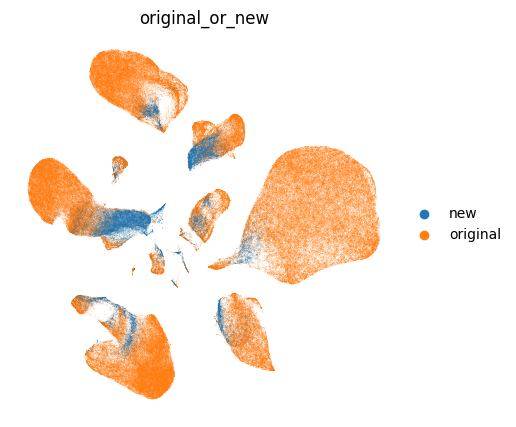

In [25]:
sc.pl.umap(adata, color=['original_or_new'], frameon=False, ncols=1)

/home/macera/.conda/envs/deepscore/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


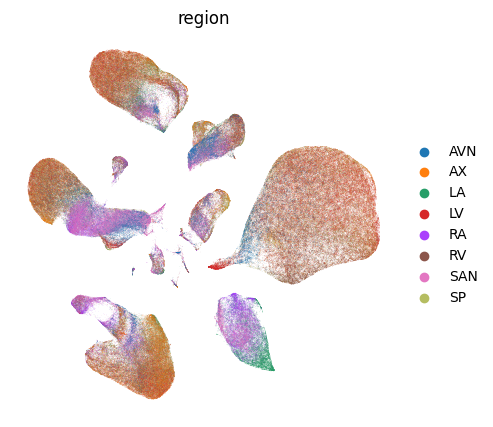

In [27]:
sc.pl.umap(adata, color=['region'], frameon=False, ncols=1)

In [30]:
adata.obs['region'].unique()

['AX', 'LV', 'RV', 'LA', 'SP', 'RA', 'SAN', 'AVN']
Categories (8, object): ['AVN', 'AX', 'LA', 'LV', 'RA', 'RV', 'SAN', 'SP']

/home/macera/.conda/envs/deepscore/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


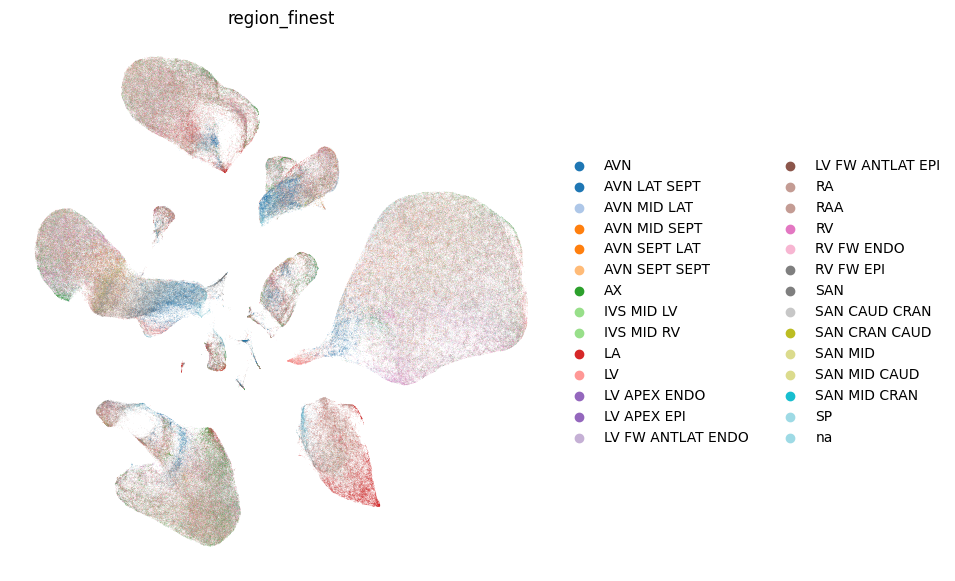

In [29]:
rcParams['figure.figsize'] = (7,7)

sc.pl.umap(adata, color=['region_finest'], frameon=False, ncols=1, palette='tab20')

In [5]:
adata.obs

,sangerID,combinedID,donor,donor_type,region,region_finest,age,gender,facility,cell_or_nuclei,...,latent_scale,n_counts,_scvi_batch,_scvi_labels,clus20,doublet_cls,original_or_new,batch,scANVI_predictions,leiden_scArches
barcode,,,,,,,,,,,,,,,,,,,,,
HCAHeart7606896_GATGAGGCACGGCTAC,HCAHeart7606896,na,D1,DBD,AX,AX,50-55,Female,Sanger,Cell,...,NaN,NaN,NaN,NaN,No,nan,original,D1_Cell_3prime-v2,Endothelial cell,10
HCAHeart7606896_CGCTTCACATTTGCCC,HCAHeart7606896,na,D1,DBD,AX,AX,50-55,Female,Sanger,Cell,...,NaN,NaN,NaN,NaN,No,nan,original,D1_Cell_3prime-v2,Mural cell,18
HCAHeart7606896_GTTAAGCAGAGACTAT,HCAHeart7606896,na,D1,DBD,AX,AX,50-55,Female,Sanger,Cell,...,NaN,NaN,NaN,NaN,No,nan,original,D1_Cell_3prime-v2,Endothelial cell,10
HCAHeart7606896_TCGCGTTGTAAGAGGA,HCAHeart7606896,na,D1,DBD,AX,AX,50-55,Female,Sanger,Cell,...,NaN,NaN,NaN,NaN,No,nan,original,D1_Cell_3prime-v2,Mural cell,3
HCAHeart7606896_GCTGCGAGTGTTGGGA,HCAHeart7606896,na,D1,DBD,AX,AX,50-55,Female,Sanger,Cell,...,NaN,NaN,NaN,NaN,No,nan,original,D1_Cell_3prime-v2,Endothelial cell,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCAHeartST13180619_HCAHeartST13177116_CTTGAATCAAACGGGC-1,HCAHeartST13180619,HCAHeartST13180619_HCAHeartST13177116,AH2,DCD,AVN,AVN,40-45,Male,Sanger,Nuclei,...,4615.056641,506.0,1.0,0.0,No,No,new,AH2_Nuclei_Multiome-v1,Fibroblast,8
HCAHeartST13180619_HCAHeartST13177116_AAAGCTTGTAGGATCC-1,HCAHeartST13180619,HCAHeartST13180619_HCAHeartST13177116,AH2,DCD,AVN,AVN,40-45,Male,Sanger,Nuclei,...,4723.684082,504.0,1.0,0.0,No,No,new,AH2_Nuclei_Multiome-v1,Lymphoid,17
HCAHeartST13180619_HCAHeartST13177116_AATCATCCATAATGAG-1,HCAHeartST13180619,HCAHeartST13180619_HCAHeartST13177116,AH2,DCD,AVN,AVN,40-45,Male,Sanger,Nuclei,...,4700.160156,501.0,1.0,0.0,No,No,new,AH2_Nuclei_Multiome-v1,Fibroblast,1


In [12]:
adata.obs['original_or_new'].value_counts()

original_or_new
original    629041
new          75255
Name: count, dtype: int64

In [ ]:
adata.obs['cell_type'].value_counts()

cell_type
Ventricular Cardiomyocyte     190710
Fibroblast                    138055
Endothelial cell              131505
Mural cell                    104593
Myeloid                        51426
Atrial Cardiomyocyte           45911
Lymphoid                       24922
Neural cell                     6622
Adipocyte                       6347
Mast cell                       1853
Lymphatic Endothelial cell      1295
Mesothelial cell                1057
Name: count, dtype: int64

In [13]:
adata.obs['scANVI_predictions'].value_counts()

scANVI_predictions
Ventricular Cardiomyocyte     191051
Fibroblast                    138270
Endothelial cell              131291
Mural cell                    104444
Myeloid                        50930
Atrial Cardiomyocyte           45953
Lymphoid                       25199
Adipocyte                       6602
Neuronal cell                   6341
Mast cell                       1840
Lymphatic Endothelial cell      1272
Mesothelial cell                1103
Name: count, dtype: int64

In [ ]:
adata.obs['batch_key'].value_counts()

batch_key
AH1_Nuclei_Multiome-v1     55785
D11_Cell_3prime-v3         45964
D2_Nuclei_3prime-v2        45050
H5_Nuclei_3prime-v3        38177
D6_Cell_3prime-v2          36677
A61_Nuclei_Multiome-v1     34607
D8_Nuclei_Multiome-v1      33554
H3_Nuclei_3prime-v3        32266
H7_Nuclei_3prime-v3        31676
AH2_Nuclei_Multiome-v1     27849
H6_Nuclei_3prime-v3        27431
D4_Nuclei_3prime-v2        26773
H4_Nuclei_3prime-v3        25707
D5_Nuclei_3prime-v2        22564
D3_Nuclei_3prime-v2        22271
H2_Nuclei_3prime-v3        21396
D6_Cell_3prime-v3          20568
AV13_Nuclei_Multiome-v1    18886
D7_Cell_3prime-v2          18528
D6_Nuclei_3prime-v2        17946
D7_Nuclei_3prime-v2        16904
D1_Nuclei_3prime-v2        15533
D7_Nuclei_Multiome-v1      13925
D11_Nuclei_3prime-v3       13844
AV14_Nuclei_Multiome-v1    10624
AV3_Nuclei_Multiome-v1      7388
D5_Cell_3prime-v2           6647
AV10_Nuclei_Multiome-v1     5757
D3_Cell_3prime-v2           5364
D3_Nuclei_Multiome-v1       2685


In [6]:
adata.obs['donor_type'].value_counts()

donor_type
DCD    446357
DBD    257939
Name: count, dtype: int64

In [7]:
adata.obs['region_finest'].value_counts()

region_finest
LV                   130304
AX                   102221
RV                    92403
SP                    88911
LA                    74501
RA                    55060
SAN                   31227
AVN                   28024
na                    23769
AVN SEPT LAT          11753
IVS MID LV             8995
LV FW ANTLAT ENDO      8274
RV FW ENDO             7949
SAN CAUD CRAN          5519
LV APEX ENDO           4905
AVN MID LAT            4844
RV FW EPI              4102
LV FW ANTLAT EPI       4039
SAN CRAN CAUD          3560
SAN MID CAUD           3482
RAA                    2435
AVN SEPT SEPT          1786
AVN LAT SEPT           1567
IVS MID RV             1118
AVN MID SEPT           1045
SAN MID CRAN           1011
LV APEX EPI             907
SAN MID                 585
Name: count, dtype: int64

In [8]:
adata.obs['region'].value_counts()

region
LV     148429
RV     104454
AX     102221
SP      99024
LA      74501
SAN     69153
RA      57495
AVN     49019
Name: count, dtype: int64

In [ ]:

# LOAD the PROCESS the REFERENCE

# ## Preprocessing


cell_type = 'subclass.l1'

ref_py = sc.read('../HORIZONTAL_RNA/objects/local.h5ad')  # LOAD the HCA Atlas
ref_py = ref_py.raw.to_adata()
ref_py.layers['counts'] = ref_py.X.copy()

ref_py.var['ENSG'] = ref_py.var.index.copy()
ref_py.var.index = ref_py.var['feature_name'].copy()

# SUBSET THE ATLAS TO MATCH OUR SAMPLE BIOLOGY

cortex_celltypes_l1= ['DCT',
 'PEC',
 'CNT',
 'POD',
 'PT',
 'IC',
 'IMM',
 'NEU',
 'VSM/P',
 'TAL',
 'EC',
 'FIB',
 'PC']

cortex_celltypes_l3= ['DCT1',
 'DCT2',
 'IC-B',
 'B',
 'MD',
 'CNT-IC-A',
 'MC',
 'CNT',
 'PT-S1/2',
 'CCD-IC-A',
 'PEC',
 'pDC',
 'EC-GC',
 'POD',
 'VSMC',
 'aPT',
 'CNT-PC',
 'FIB',
 'cDC',
 'REN',
 'EC-PTC',
 'T',
 'PT-S3',
 'ncMON',
 'NKC/T',
 'aTAL1',
 'C-TAL',
 'PL',
 'CCD-PC',
 'SC/NEU',
 'EC-LYM',
 'MDC',
 'N',
 'MAST',
 'aTAL2',
 'aFIB',
 'MYOF',
 'MAC-M2',
 'EC-AEA',
 'VSMC/P']


ref_py = ref_py[ref_py.obs['subclass.l1'].isin(cortex_celltypes_l1)]

ref_py = ref_py[ref_py.obs['subclass.l3'].isin(cortex_celltypes_l3)]

ref_py = ref_py[ref_py.obs['condition.long'].isin(['Normal Reference'])]


ref_py = ref_py[ref_py.obs['state.l2'].isin(['reference','adaptive - epi','adaptive - str'])].copy()


cell_type = 'subclass.l1'
overlapping = False
compute = True


ref_py.X = ref_py.X.copy()
sc.pp.normalize_total(ref_py, target_sum=1e4)
sc.pp.log1p(ref_py)


markers_filename= f'HCA_l1'

# Identify HCA ATLAS differentially expressed genes between cell types 

if compute == True:
    sc.tl.rank_genes_groups(ref_py, cell_type, method='wilcoxon', use_raw=False)
    ranked_genes_populations = ref_py.uns['rank_genes_groups'].copy()
    with open(f'markers_ds/{markers_filename}.pickle', 'wb') as handle:
        pickle.dump(ranked_genes_populations, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(f'markers_ds/{markers_filename}.pickle', 'rb') as handle:
        ranked_genes_populations = pickle.load(handle) 

In [4]:
ref_py

AnnData object with n_obs × n_vars = 63638 × 33920
    obs: 'nCount_RNA', 'nFeature_RNA', 'library', 'percent.er', 'percent.mt', 'degen.score', 'aEpi.score', 'aStr.score', 'cyc.score', 'matrisome.score', 'collagen.score', 'glycoprotein.score', 'proteoglycan.score', 'S.Score', 'G2M.Score', 'experiment', 'specimen', 'condition.long', 'condition.l1', 'condition.l2', 'donor_id', 'region.l1', 'region.l2', 'percent.cortex', 'percent.medulla', 'tissue_type', 'id', 'pagoda_k100_infomap_coembed', 'subclass.full', 'subclass.l3', 'subclass.l2', 'subclass.l1', 'state.l2', 'state', 'class', 'structure', 'disease_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'eGFR', 'BMI', 'diabetes_history', 'hypertension', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self

In [ ]:
## SET PARAMETERS
n_markers = 500 # Max number of markers to use per cell-type
overlapping = False # Parameter to control overlapping marker genes between cell types on the prediction.


ref_py_save = ref_py.copy()

for mod in ['scRNA','snRNA','scRNA5p']:
    if os.path.exists(f'csv/Deepscore_HCA_l1_{mod}_CLEAN.csv'):
        print(f'{mod} already exists!')

    adata = sc.read(f'../HORIZONTAL_RNA/objects/{mod}_raw.h5ad', compression='gzip')
    adata.X = adata.layers['counts'].copy()
    adata = adata[adata.obs['batch'].isin([mod])].copy()


    with open(f'markers_ds/{markers_filename}.pickle', 'rb') as handle:
        ranked_genes_populations = pickle.load(handle) 

    if overlapping:
        selected_markers =[]
        for cell_type_ in ref_py.obs[cell_type].unique():
            cell_type_markers = []
            for marker in ranked_genes_populations['names'][cell_type_][:n_markers]:
                if marker in adata.var.index: 
                    selected_markers.append(marker)
        selected_markers = set(selected_markers)

    else:
        # Step 2: Store markers for each subset
        subset_markers_dict ={}
        for subset in ref_py.obs[cell_type].unique():
            subset_markers = ranked_genes_populations['names'][subset]
            subset_markers = [gene for gene in subset_markers if gene in adata.var.index]
            subset_markers_dict[subset] = set(subset_markers[:n_markers+100])

        # Step 3: Identify overlapping markers
        overlapping_markers = set()
        for subset, markers in subset_markers_dict.items():
            for other_subset, other_markers in subset_markers_dict.items():
                if subset != other_subset:
                    overlapping_markers.update(markers.intersection(other_markers))

        # Step 4: Select markers for each subset, excluding overlapping markers
        marker_dict = {}
        for subset, markers in subset_markers_dict.items():
            unique_markers = [marker for marker in markers if marker not in overlapping_markers]
            marker_dict[subset] = unique_markers[:n_markers]  # Select up to TOP n_markers
        selected_markers = [marker for subset in marker_dict for marker in marker_dict[subset]]



    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)


    # Subset the data to the selected markers

    ref_py = ref_py_save[:, list(selected_markers)].copy()
    adata = adata[:, list(selected_markers)].copy()

    len(selected_markers)

    sc.pp.scale(ref_py)
    sc.pp.scale(adata)

    ref_py.obs[cell_type] = ref_py.obs[cell_type].tolist()
    len(ref_py.obs[cell_type].unique())


    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr * tf.math.exp(-0.1)


    n_feat = ref_py.shape[1]
    n_labs = len(ref_py.obs[cell_type].unique())

    ds = deepscore.DeepScore(hidden_nodes=[1024, 256],
                   n_features=n_feat, 
                   n_labels=n_labs,
                   epochs=30,
                   batch_size=128, 
                   activation="relu", 
                   dropout=True, 
                   dropout_rate=0.1,
                   batchnorm=True, 
                   lr=0.001,
                   weight_reg=True)




    import os
    os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"

    ds.set_reference(ref_py, label_by=cell_type, test_prop=0.1)

    ds.train(earlystopping=True, patience=10, lr_scheduler=scheduler,)
    # ds.model.save(f'models/deepscore') # In case you want to save the DS model

    prob_df, adata = ds.annotate(adata, pred_key='Deepscore_HCA',Unclassified = False,return_pred_matrix=True)

    # SAVE the RESULTS on csv
    adata.obs[['Deepscore_HCA','Deepscore_HCA_score']].to_csv(f'csv/Deepscore_HCA_l1_{mod}_CLEAN.csv')

    prob_df.to_csv(f'csv/prob_matrix/Deepscore_HCA_l1_{mod}_CLEAN.csv')


scRNA already exists!


2024-01-29 11:48:59.300151: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-01-29 11:48:59.300194: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: IJC20724
2024-01-29 11:48:59.300204: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: IJC20724
2024-01-29 11:48:59.300386: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: Not found: was unable to find libcuda.so DSO loaded into this program
2024-01-29 11:48:59.300433: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.125.6
2024-01-29 11:48:59.300915: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild Tenso

Model: "deepscore"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 2565)              10260     
_________________________________________________________________
dense1024 (Dense)            (None, 1024)              2627584   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense256 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               10

2024-01-29 11:48:59.631055: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 587631240 exceeds 10% of free system memory.
2024-01-29 11:48:59.894869: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2024-01-29 11:48:59.894896: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2024-01-29 11:48:59.916028: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2024-01-29 11:48:59.917813: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 528861960 exceeds 10% of free system memory.
2024-01-29 11:49:00.217774: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
  9/403 [..............................] - ETA: 9s - loss: 1.1736 - categorical_accuracy: 0.6736 

2024-01-29 11:49:01.230029: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2024-01-29 11:49:01.230051: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2024-01-29 11:49:01.249695: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2024-01-29 11:49:01.251707: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2024-01-29 11:49:01.256013: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./deepscore_logs/train/plugins/profile/2024_01_29_11_49_01

2024-01-29 11:49:01.257296: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./deepscore_logs/train/plugins/profile/2024_01_29_11_49_01/IJC20724.trace.json.gz
2024-01-29 11:49:01.261654: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./deepscore_logs/train/plugins/profile/2024_01_29_11_49_0

403/403 [==============================] - 9s 21ms/step - loss: 0.1763 - categorical_accuracy: 0.9474 - val_loss: 0.1187 - val_categorical_accuracy: 0.9609
Epoch 2/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0467 - categorical_accuracy: 0.9849 - val_loss: 0.1123 - val_categorical_accuracy: 0.9644
Epoch 3/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0270 - categorical_accuracy: 0.9908 - val_loss: 0.1628 - val_categorical_accuracy: 0.9571
Epoch 4/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0189 - categorical_accuracy: 0.9935 - val_loss: 0.1493 - val_categorical_accuracy: 0.9604
Epoch 5/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0181 - categorical_accuracy: 0.9941 - val_loss: 0.1595 - val_categorical_accuracy: 0.9614
Epoch 6/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0174 - categorical_accuracy: 0.9941 - val_loss: 0.1754 - val_categorical_accuracy: 0.9548
Epoch 7/3

2024-01-29 11:50:41.081102: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 364363380 exceeds 10% of free system memory.
2024-01-29 11:50:41.237652: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 364363380 exceeds 10% of free system memory.


snRNA already exists!
Model: "deepscore"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 2565)              10260     
_________________________________________________________________
dense1024 (Dense)            (None, 1024)              2627584   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
dense256 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None,

2024-01-29 11:50:57.109355: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 587631240 exceeds 10% of free system memory.
2024-01-29 11:50:57.360644: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2024-01-29 11:50:57.360663: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2024-01-29 11:50:57.360691: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/30
  6/403 [..............................] - ETA: 13s - loss: 1.4632 - categorical_accuracy: 0.5911

2024-01-29 11:50:58.139110: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2024-01-29 11:50:58.139129: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2024-01-29 11:50:58.200394: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2024-01-29 11:50:58.201619: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2024-01-29 11:50:58.203792: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./deepscore_logs/train/plugins/profile/2024_01_29_11_50_58

2024-01-29 11:50:58.205042: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./deepscore_logs/train/plugins/profile/2024_01_29_11_50_58/IJC20724.trace.json.gz
2024-01-29 11:50:58.206975: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./deepscore_logs/train/plugins/profile/2024_01_29_11_50_5

403/403 [==============================] - 9s 21ms/step - loss: 0.1784 - categorical_accuracy: 0.9457 - val_loss: 0.1042 - val_categorical_accuracy: 0.9667
Epoch 2/30
403/403 [==============================] - 8s 20ms/step - loss: 0.0461 - categorical_accuracy: 0.9852 - val_loss: 0.1098 - val_categorical_accuracy: 0.9689
Epoch 3/30
403/403 [==============================] - 8s 20ms/step - loss: 0.0266 - categorical_accuracy: 0.9910 - val_loss: 0.1250 - val_categorical_accuracy: 0.9675
Epoch 4/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0221 - categorical_accuracy: 0.9928 - val_loss: 0.1310 - val_categorical_accuracy: 0.9674
Epoch 5/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0154 - categorical_accuracy: 0.9950 - val_loss: 0.1534 - val_categorical_accuracy: 0.9630
Epoch 6/30
403/403 [==============================] - 8s 20ms/step - loss: 0.0173 - categorical_accuracy: 0.9941 - val_loss: 0.1567 - val_categorical_accuracy: 0.9658
Epoch 7/3

2024-01-29 11:52:36.776479: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2024-01-29 11:52:36.776500: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2024-01-29 11:52:36.776566: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/30
  6/403 [..............................] - ETA: 12s - loss: 1.4345 - categorical_accuracy: 0.5794

2024-01-29 11:52:37.544067: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2024-01-29 11:52:37.544088: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2024-01-29 11:52:37.603690: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2024-01-29 11:52:37.604771: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2024-01-29 11:52:37.606774: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./deepscore_logs/train/plugins/profile/2024_01_29_11_52_37

2024-01-29 11:52:37.607931: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./deepscore_logs/train/plugins/profile/2024_01_29_11_52_37/IJC20724.trace.json.gz
2024-01-29 11:52:37.609667: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./deepscore_logs/train/plugins/profile/2024_01_29_11_52_3

403/403 [==============================] - 9s 21ms/step - loss: 0.1793 - categorical_accuracy: 0.9455 - val_loss: 0.1158 - val_categorical_accuracy: 0.9651
Epoch 2/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0459 - categorical_accuracy: 0.9849 - val_loss: 0.1354 - val_categorical_accuracy: 0.9619
Epoch 3/30
403/403 [==============================] - 8s 20ms/step - loss: 0.0250 - categorical_accuracy: 0.9916 - val_loss: 0.1431 - val_categorical_accuracy: 0.9626
Epoch 4/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0198 - categorical_accuracy: 0.9934 - val_loss: 0.1576 - val_categorical_accuracy: 0.9605
Epoch 5/30
403/403 [==============================] - 8s 20ms/step - loss: 0.0186 - categorical_accuracy: 0.9938 - val_loss: 0.1937 - val_categorical_accuracy: 0.9562
Epoch 6/30
403/403 [==============================] - 8s 21ms/step - loss: 0.0151 - categorical_accuracy: 0.9946 - val_loss: 0.1732 - val_categorical_accuracy: 0.9625
Epoch 7/3